In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define dataset directory
dataset_dir = "caltech101/101_ObjectCategories"

# Safely remove "BACKGROUND_Google" folder if it exists
background_folder = os.path.join(dataset_dir, "BACKGROUND_Google")
if os.path.exists(background_folder):
    try:
        # Remove the folder
        for root, dirs, files in os.walk(background_folder, topdown=False):
            for file in files:
                os.remove(os.path.join(root, file))
            for dir in dirs:
                os.rmdir(os.path.join(root, dir))
        os.rmdir(background_folder)
        print(f"Removed folder: {background_folder}")
    except Exception as e:
        print(f"Error while removing {background_folder}: {e}")
else:
    print(f"No {background_folder} folder to remove.")

# Filter out non-directory entries
classes = sorted([category for category in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, category))])

# Initialize variables
image_data = []
labels = []

# Use the filtered `classes` list for loading images
for label, category in enumerate(classes):
    category_path = os.path.join(dataset_dir, category)
    for file in os.listdir(category_path):
        img_path = os.path.join(category_path, file)
        if os.path.isfile(img_path):  # Ensure it's a valid file, not a subdirectory
            img = cv2.imread(img_path)
            if img is not None:  # Ensure the image is valid
                img_resized = cv2.resize(img, (128, 128))
                image_data.append(img_resized)
                labels.append(label)

# Convert to numpy arrays
image_data = np.array(image_data, dtype=np.float32) / 255.0
labels = np.array(labels, dtype=np.int32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    image_data, labels, test_size=0.2, stratify=labels, random_state=42
)

print(f"Classes: {classes}")
print(f"Total Valid Classes: {len(classes)}")
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

No caltech101/101_ObjectCategories/BACKGROUND_Google folder to remove.
Classes: ['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 's

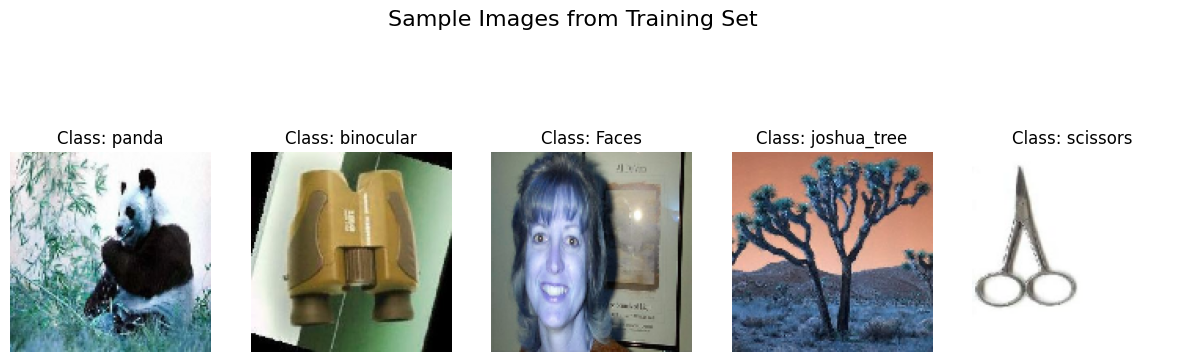

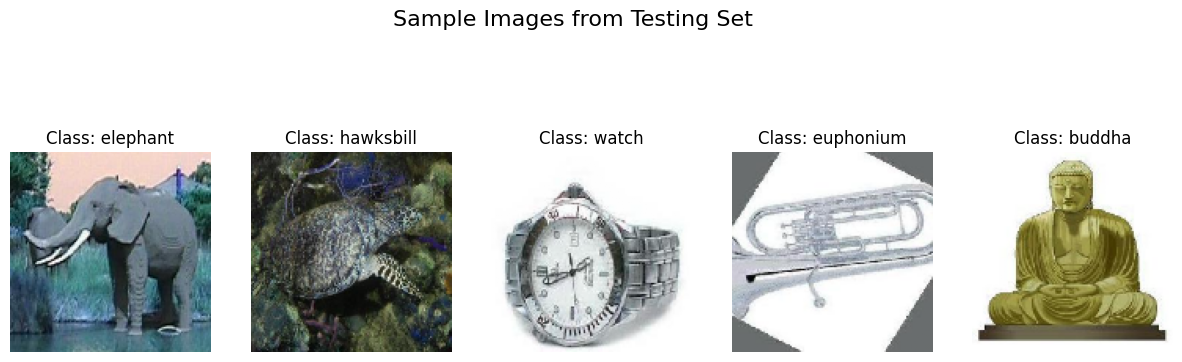

In [2]:
import matplotlib.pyplot as plt

# Function to plot images with labels
def plot_samples(images, labels, classes, num_samples=5, dataset_name="Dataset"):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        idx = np.random.randint(0, len(images))  # Randomly pick an index
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx])
        plt.title(f"Class: {classes[labels[idx]]}")
        plt.axis("off")
    plt.suptitle(f"Sample Images from {dataset_name}", fontsize=16)
    plt.show()

# Visualize training samples
plot_samples(X_train, y_train, classes, num_samples=5, dataset_name="Training Set")

# Visualize testing samples
plot_samples(X_test, y_test, classes, num_samples=5, dataset_name="Testing Set")


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

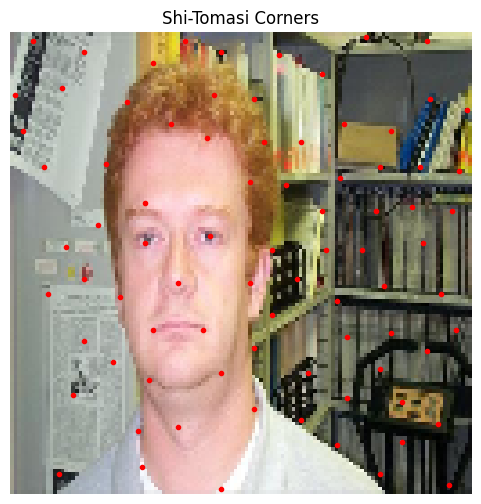

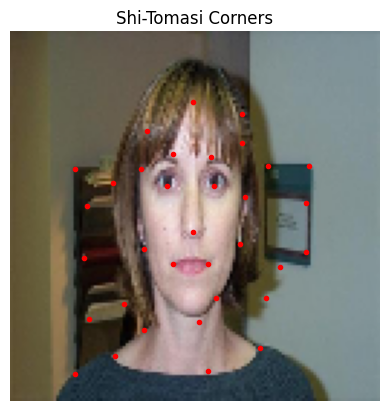

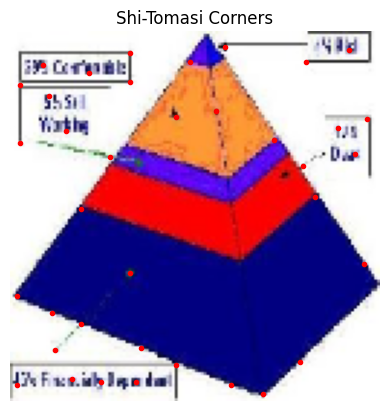

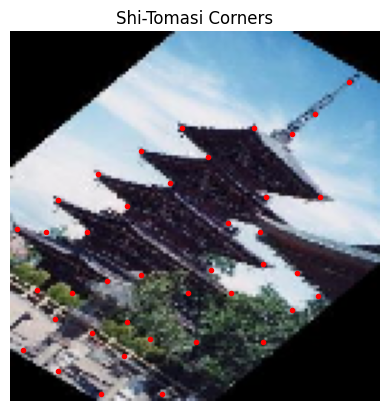

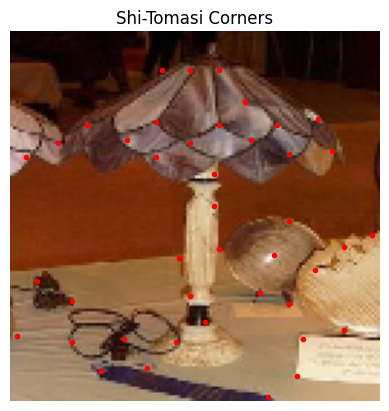

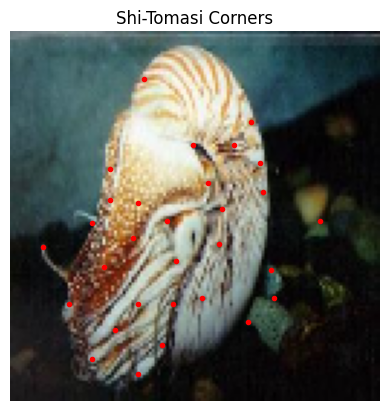

In [ ]:
def extract_shi_tomasi_features(image, max_corners=100, quality_level=0.01, min_distance=10):
    """
    Extract Shi-Tomasi corners from the image.
    
    Parameters:
    - image: Input image.
    - max_corners: Maximum number of corners to detect.
    - quality_level: Minimum accepted quality of corners.
    - min_distance: Minimum distance between corners.
    
    Returns:
    - corners: Array of detected corners.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=max_corners, qualityLevel=quality_level, minDistance=min_distance)
    corners = np.astype(corners, int)
    return corners

# Example usage using random image from the training set
random_idx = np.random.randint(0, len(X_train))
sample_image = X_train[random_idx]  # Use the first image from the training set
shi_tomasi_corners = extract_shi_tomasi_features(sample_image)

# Visualize Shi-Tomasi corners
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
if shi_tomasi_corners is not None:
    for corner in shi_tomasi_corners:
        x, y = corner.ravel()
        plt.plot(x, y, 'ro', markersize=3)
plt.title("Shi-Tomasi Corners")
plt.axis("off")
plt.show()

for i in range(5):  # Show corners for 5 random images
    img = X_train[np.random.randint(0, len(X_train))]
    corners = extract_shi_tomasi_features(img, max_corners=200, quality_level=0.08, min_distance=10)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if corners is not None:
        for corner in corners:
            x, y = corner.ravel()
            plt.plot(x, y, 'ro', markersize=3)
    plt.title("Shi-Tomasi Corners")
    plt.axis("off")
    plt.show()